# Support Vector Machines
## Exercise

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.



## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

## Complete the Tasks in bold

**TASK: Run the cells below to import the libraries and load the dataset.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
df.head(20
      )

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Legit,red
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Legit,red
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Legit,red
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Legit,red
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Legit,red


**TASK: What are the unique variables in the target column we are trying to predict (quality)?**

In [4]:
df["quality"].unique()

array(['Legit', 'Fraud'], dtype=object)

**TASK: Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

<AxesSubplot: xlabel='quality', ylabel='count'>

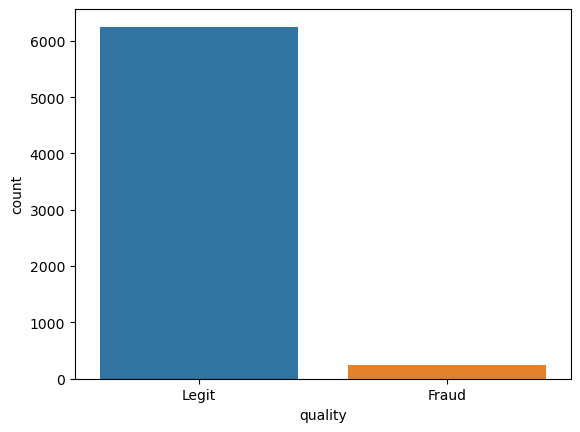

In [5]:
sns.countplot(x= df["quality"], label = "Count") ## Is not balanced

**TASK: Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<AxesSubplot: xlabel='type', ylabel='count'>

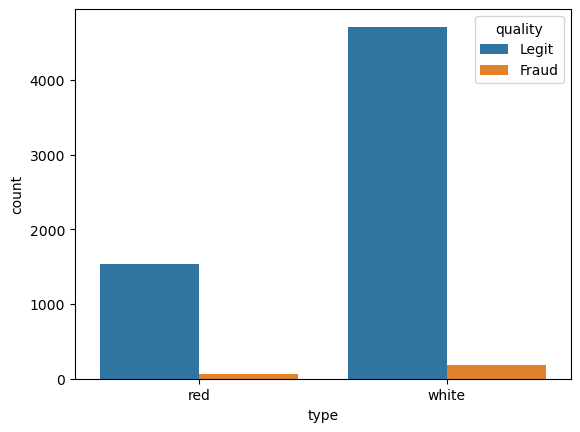

In [6]:
sns.countplot(df, x="type", hue = "quality") ## Is not balanced

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


**TASK: What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [8]:
red_fraud_count = len(df[(df['type'] == 'red') & (df['quality'] == 'Fraud')])
red_fraud_ratio = red_fraud_count / len(df[(df['type'] == 'red')])*100
print(f"The percentage of fraud in Red Wines is {red_fraud_ratio}")


The percentage of fraud in Red Wines is 3.9399624765478425


In [9]:
white_fraud_count = len(df[(df['type'] == 'white') & (df['quality'] == 'Fraud')])
white_fraud_ratio = white_fraud_count / len(df[(df['type'] == 'white')])*100
print(f"The percentage of fraud in White is {white_fraud_ratio}")


The percentage of fraud in White is 3.7362188648427925


**TASK: Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [10]:
# CODE HERE

In [11]:
# Convert 'quality' to numeric: 1 for 'Legit', 0 for 'Fraud'
df['quality'] = df['quality'].apply(lambda x: 1 if x == 'Legit' else 0)


In [12]:
# Separate numerical and categorical features
X_num = df.select_dtypes(include=['float64'])
X_cat = df.select_dtypes(include=['object'])

In [13]:
# Calculate correlation between numerical features and 'quality'
correlation_numerical = X_num.corrwith(df['quality'])

# Print the correlation matrix
print(correlation_numerical)

fixed acidity          -0.021794
volatile acidity       -0.151228
citric acid             0.061789
residual sugar          0.048756
chlorides              -0.034499
free sulfur dioxide     0.085204
total sulfur dioxide    0.035252
density                -0.016351
pH                     -0.020107
sulphates               0.034046
alcohol                 0.051141
dtype: float64


**TASK: Create a bar plot of the correlation values to Fraudlent wine.**

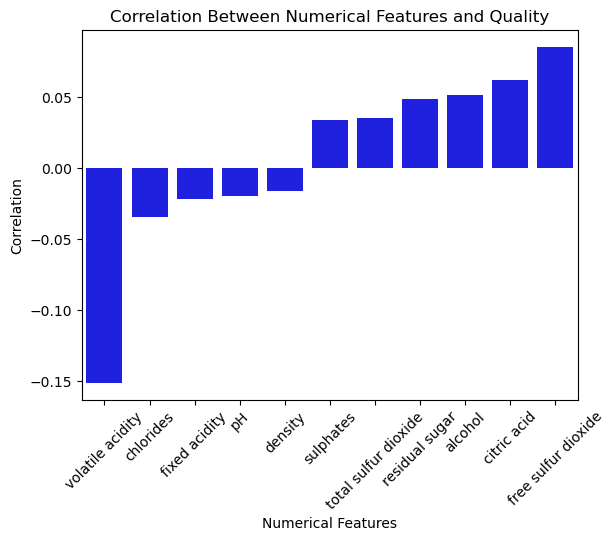

In [14]:
sorted_correlations = correlation_numerical.sort_values()
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, color="Blue")
plt.title('Correlation Between Numerical Features and Quality')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

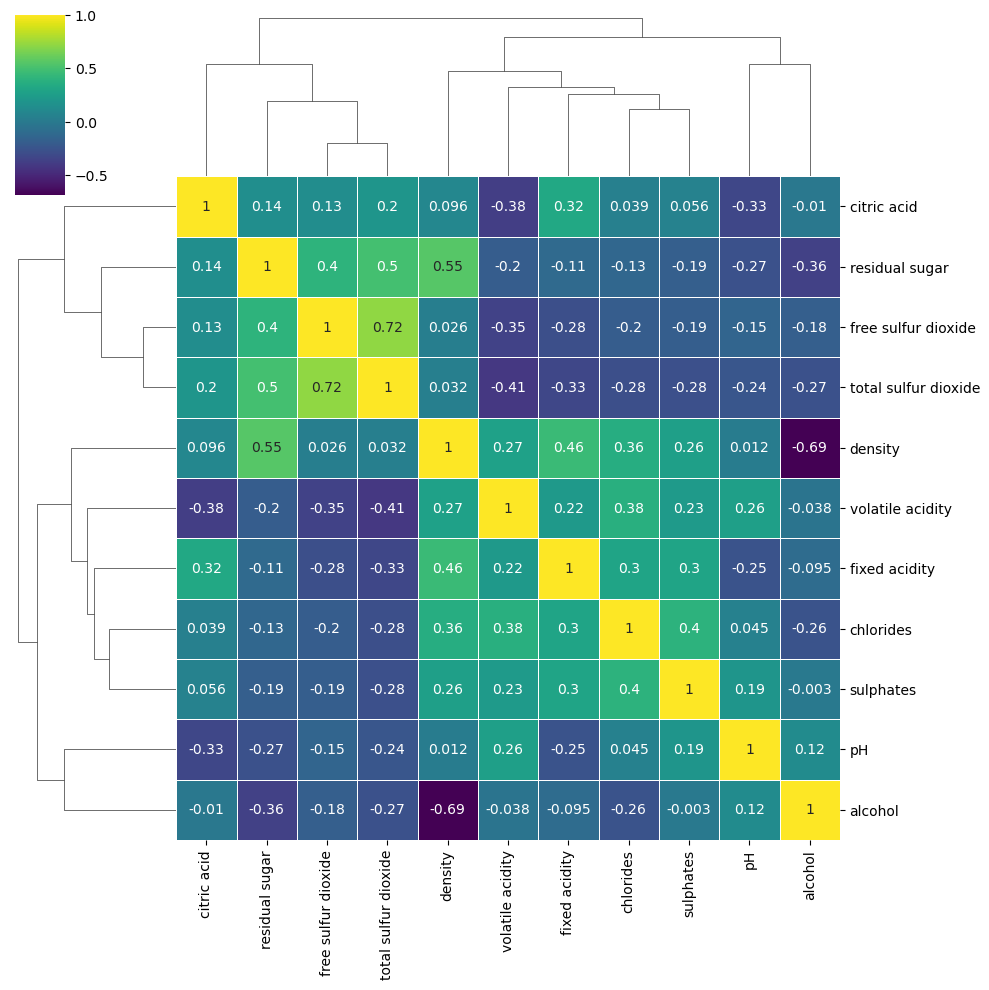

In [15]:
import seaborn as sns

# Calculate the correlation matrix for numerical features
correlation_matrix = X_num.corr()

# Create a cluster map
cluster_grid = sns.clustermap(correlation_matrix, cmap='viridis', annot=True, linewidths=.5, figsize=(10, 10))

# Print the cluster map object
print(cluster_grid)

----
## Machine Learning Model

**TASK: Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [16]:
X_cat_encoded = pd.get_dummies(df['type'], prefix='type')

# Concatenate numerical and categorical features
X = pd.concat([X_num, X_cat_encoded], axis=1)


In [17]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,1


**TASK: Separate out the data into X features and y target label ("quality" column)**

In [18]:
y = df["quality"]
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: int64

**TASK: Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [19]:
from sklearn.model_selection import train_test_split


# Perform train-test split with 10% test size and random state of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

**TASK: Scale the X train and X test data.**

In [21]:
X_train = X_train_balanced
y_train = y_train_balanced

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the X_train data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the X_test data using the same scaler
X_test_scaled = scaler.transform(X_test)


**TASK: Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1]
}

# Instantiate the SVM classifier
svm_classifier = SVC(class_weight='balanced')

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1, refit = True)

In [32]:

# Perform grid search on the training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# You can access the best model using grid_search.best_estimator_
best_svm_classifier = grid_search.best_estimator_

# Now you can use best_svm_classifier for predictions


Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


**TASK: Display the confusion matrix and classification report for your model.**

1.   Elemento de la lista
2.   Elemento de la lista



In [33]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


# Train (fit) the SVM classifier on the training data
best_svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = best_svm_classifier.predict(X_test_scaled)

# Display the confusion matrix
conf_matrix_labeled = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix_labeled)

# Display the classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 15  12]
 [ 55 568]]

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.56      0.31        27
           1       0.98      0.91      0.94       623

    accuracy                           0.90       650
   macro avg       0.60      0.73      0.63       650
weighted avg       0.95      0.90      0.92       650



In [34]:
from sklearn.preprocessing import LabelEncoder


In [35]:
import pickle

In [36]:
filename = 'trained_wine_SVMclassification_model.sav'
pickle.dump(svm_classifier,open(filename,'wb'))